In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-football-results-from-1872-to-2017/goalscorers.csv
/kaggle/input/international-football-results-from-1872-to-2017/shootouts.csv
/kaggle/input/international-football-results-from-1872-to-2017/results.csv


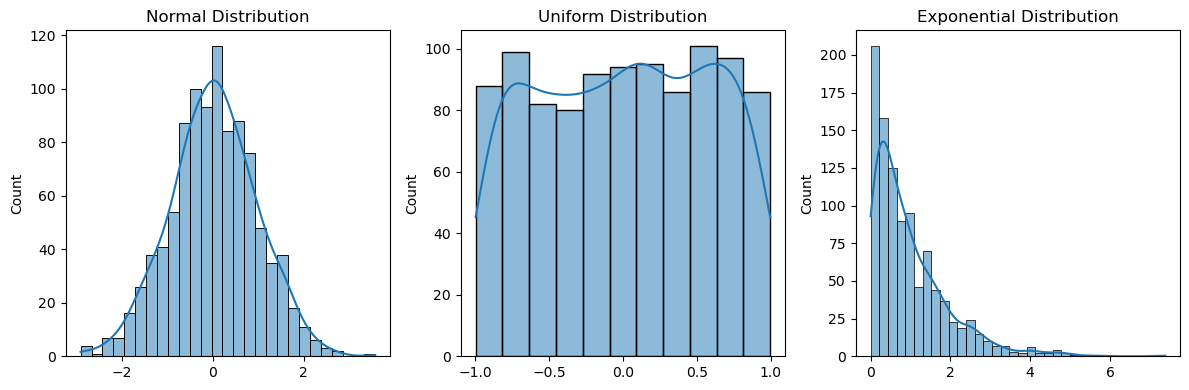

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data from different univariate distributions
normal_data = np.random.normal(loc=0, scale=1, size=1000)
uniform_data = np.random.uniform(low=-1, high=1, size=1000)
exponential_data = np.random.exponential(scale=1, size=1000)

# Plotting the distributions
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(normal_data, kde=True)
plt.title("Normal Distribution")

plt.subplot(1, 3, 2)
sns.histplot(uniform_data, kde=True)
plt.title("Uniform Distribution")

plt.subplot(1, 3, 3)
sns.histplot(exponential_data, kde=True)
plt.title("Exponential Distribution")

plt.tight_layout()
plt.show()




In [17]:
import statsmodels.api as sm

df = pd.read_csv("/kaggle/input/international-football-results-from-1872-to-2017/results.csv")
#df.describe()
# df.plot()
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')


grouped_df = df.groupby('home_team')['home_score'].mean()
grouped_df.head(5)



There are 44691 rows and 9 columns


home_team
Abkhazia       2.000000
Afghanistan    1.285714
Albania        1.130208
Alderney       0.714286
Algeria        1.855769
Name: home_score, dtype: float64

In [7]:
import pandas as pd
df = pd.read_csv("/kaggle/input/international-football-results-from-1872-to-2017/results.csv")

from datetime import datetime

def game_outcome(home_score, away_score):
    outcome = "D"
    if home_score > away_score:
        outcome = "H"
    elif home_score < away_score:
        outcome = "A"
    return outcome

def winning_team(home_score, away_score, home_team, away_team):
    if home_score > away_score:
        return home_team
    elif home_score < away_score:
        return away_team
    else:
        return None

def losing_team(home_score, away_score, home_team, away_team):
    if home_score < away_score:
        return home_team
    elif home_score > away_score:
        return away_team
    else:
        return None

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.strftime('%Y')
df['month'] = df['date'].dt.strftime('%b')
df['dayofweek'] = df['date'].dt.day_name()

df['outcome'] = df.apply(lambda row: game_outcome(row['home_score'], row['away_score']), axis=1)
df['winning_team'] = df.apply(lambda row: winning_team(row['home_score'], row['away_score'], row['home_team'], row['away_team']), axis=1)
df['losing_team'] = df.apply(lambda row: losing_team(row['home_score'], row['away_score'], row['home_team'], row['away_team']), axis=1)

df.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,dayofweek,outcome,winning_team,losing_team
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Nov,Saturday,D,None,None
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,Mar,Saturday,H,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Mar,Saturday,H,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,Mar,Saturday,D,None,None
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Mar,Saturday,H,Scotland,England
